# KNN - K Nearest Neighbors. Classification 

* Works with any number of classes <br>
**Cons** 
* High Prediction Cost (worse for large data sets)
* Not good with high dimensional data
* Categorical Features don’t work well

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl

Load the dataset

In [2]:
df = pd.read_csv("../../Datasets/Classified Data",index_col=0)
df.head(1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1


## Scale
**Activation function - Normalize the data**<br>
To ease the function and get better results, er apply an activation functiion on the dataset, before give itt to the model.<br>
It takes the values and changes them to value in a scale between 0 to 1.<br>
It's good as long as the rates are still the same.<br>
* MIN = 0<br>
* MAX = 1<br>

In a case we have numbers between `20(MIN)` to `80(MAX)`<br>
* 20 = 0 | Because (0*60(MAX-MIN)) + 20(MIN) = 20<br>
* 50 - 0.5 | Because (0.5*60(MAX-MIN)) + 20(MIN) = 50<br>
* 80 = 1 | Because (1*60(MAX-MIN)) + 20(MIN) = 80<br>

For exemple, the answer is 0.3<br>
0.3 * 60(MAX-MIN) = 18 +20(MIN) = 38<br>

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

## Split to - X(Train), Y(Test) 
Create an X array that contains the features to train on, and a y array with the target variable - the Price column.
While we remove any non valuable data

### Use sklearn.model_selection.train_test_split to split the data (train/test) <br>
We split the data to 70% and 30% , run the model on 70% data, and then test on the 30% and see if the results are close to the real values. 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'],
                                                    test_size=0.30, 
                                                    random_state=101)

## Create the Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=34)

## Train the Model
While in other models we can delete (or just don't use) the train data, here we have to save it to predict new values in the future.<br>
Because it comperes between the new data to all the rest.

In [12]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

## Test the Model

Predict the test set, and than check it to decide if the model is good.

In [15]:
predictions = model.predict(X_test)

### Score 
A Math mathod (A precent of 100) <br>
**Be Carful!** when the score is 99% it can be a lie - because it will say only false, and never true.<br>
It happens in situations when most of the dataset is false and just a litlle is true.<br>
Like:<br>
* Should I give a costumer a premium account
* Should I send a person toa rare check
* Will the costumerwill buy a really expencive product<br>

In [16]:
model.score(X_test,y_test)

0.9566666666666667

### confusion_matrix
Because of the score problem, we use a confusion_matrix.<br>
When there aren't numbers on the right column it means that the model never said False.<br>
We want to see numbers only on the main diagonal, and that the rest eill be zeros.
# TN&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FP  
**True Negative**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**False Positive**<br>
(The model said 0 and it's TRUE)&nbsp;&nbsp;&nbsp;&nbsp;(The model said 1 and it's FALSE)

# FN&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TP
**False Negative**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**True Positive**<br>
(The model said 0 and it's FALSE)&nbsp;&nbsp;&nbsp;&nbsp;(The model said 0 and it's TRUE)

In [17]:
import sklearn.metrics as skmet
skmet.confusion_matrix(y_test,predictions)

array([[153,   6],
       [  7, 134]], dtype=int64)

### classification_report

**Accurancy** - (TN +TP)/TOTAL | Like the score, it's good when the False and True values in the dataseet are equal.<br>
**Recall**/Positive rate/Sensitivity - TP / (FN + TP) | The precent of the trues it found of all of the trues (How many sick people it recognised of all the sick people- 100% is necessary. How many spam mails it recognised of all the spam mails- 100% isn't necessary)<br>
**Precision** - TP / (FP + TP) | Actual yes / Total perdicted yes<br>
The precent of the real trues it found of all of the trues it found (How many sick people it recognised that are really sick - 100% is not necessary. How many spam mails it recognised hat are real spam - 100% is necessary)<br>
**F1-score** - 2*((Precision*Recall)/(Precision + Recall))

In [18]:
print(skmet.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Find the perfect n_neighbors

In [33]:
error_rate = []
max_neighbors = int(input('Enter maximum n_neighbors to check: '))

for i in range(1,max_neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error = np.mean(pred_i != y_test)
    error_rate.append(error)
    print ('n_neighbors: {} ,Error_rate: {}'.format(i,error))

Enter maximum n_neighbors to check: 40
n_neighbors: 1 ,Error_rate: 0.07666666666666666
n_neighbors: 2 ,Error_rate: 0.09
n_neighbors: 3 ,Error_rate: 0.05
n_neighbors: 4 ,Error_rate: 0.07
n_neighbors: 5 ,Error_rate: 0.056666666666666664
n_neighbors: 6 ,Error_rate: 0.05
n_neighbors: 7 ,Error_rate: 0.06666666666666667
n_neighbors: 8 ,Error_rate: 0.06
n_neighbors: 9 ,Error_rate: 0.05
n_neighbors: 10 ,Error_rate: 0.056666666666666664
n_neighbors: 11 ,Error_rate: 0.05333333333333334
n_neighbors: 12 ,Error_rate: 0.04666666666666667
n_neighbors: 13 ,Error_rate: 0.05
n_neighbors: 14 ,Error_rate: 0.056666666666666664
n_neighbors: 15 ,Error_rate: 0.056666666666666664
n_neighbors: 16 ,Error_rate: 0.05
n_neighbors: 17 ,Error_rate: 0.05
n_neighbors: 18 ,Error_rate: 0.04666666666666667
n_neighbors: 19 ,Error_rate: 0.05
n_neighbors: 20 ,Error_rate: 0.05333333333333334
n_neighbors: 21 ,Error_rate: 0.05
n_neighbors: 22 ,Error_rate: 0.05
n_neighbors: 23 ,Error_rate: 0.06333333333333334
n_neighbors: 24 ,Er

### Use a figure to watch the results

Text(0, 0.5, 'Error Rate')

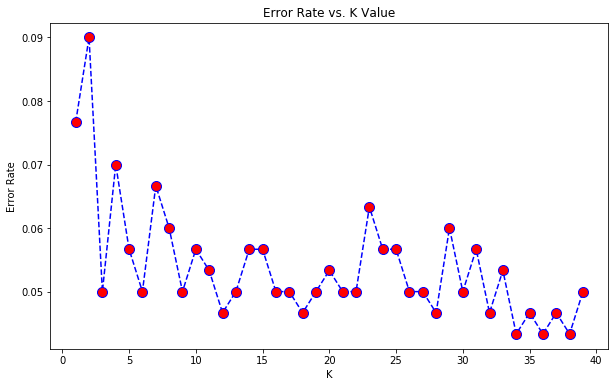

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,max_neighbors),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

If 95% is enuegh, it's best to use 3 n_neighbors, eventhough gets 98% with 34 n_neighbors.<br>
It's segessted to use the minimum n_neighbors to prevent long running time on prodaction.